# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [1]:
# Import your libraries:
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [3]:
websites = pd.read_csv(r'C:\Users\ievav\OneDrive\Documents\Ironhack\Assignments\lab-supervised-learning-es\website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [5]:
# What the dataset looks like?

websites.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [9]:
# What are the data types?
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [11]:
# Transforming some column data types


# Step 1: Convert CONTENT_LENGTH to numeric, coerce errors to NaN
websites['CONTENT_LENGTH'] = pd.to_numeric(websites['CONTENT_LENGTH'], errors='coerce')

# Step 2: Check for NaN values
print(f"Number of NaN values in CONTENT_LENGTH: {websites['CONTENT_LENGTH'].isna().sum()}")

# Step 3: Handle NaN values
websites['CONTENT_LENGTH'].fillna(0, inplace=True)  # Fill NaNs with 0 or another value

# Step 4: Convert to int directly
websites['CONTENT_LENGTH'] = websites['CONTENT_LENGTH'].astype(int)

# Step 5: Verify the change
print(websites['CONTENT_LENGTH'].dtype)  # Should print 'int64'
print(websites['CONTENT_LENGTH'].head())  # Check the first few rows



# Step 1: Convert to numeric, coerce errors to NaN
websites['DNS_QUERY_TIMES'] = pd.to_numeric(websites['DNS_QUERY_TIMES'], errors='coerce')

# Step 2: Check for NaN values
print(f"Number of NaN values: {websites['DNS_QUERY_TIMES'].isna().sum()}")

# Step 3: Handle NaN values
websites['DNS_QUERY_TIMES'].fillna(0, inplace=True)  # Fill NaNs with 0 or another value

# Step 4: Convert to int directly
websites['DNS_QUERY_TIMES'] = websites['DNS_QUERY_TIMES'].astype(int)

# Step 5: Verify the change
print(websites['DNS_QUERY_TIMES'].dtype)  # Should print 'int64'
print(websites['DNS_QUERY_TIMES'].head())  # Check the first few rows

Number of NaN values in CONTENT_LENGTH: 812
int32
0       263
1     15087
2       324
3       162
4    124140
Name: CONTENT_LENGTH, dtype: int32
Number of NaN values: 1
int32
0    2
1    0
2    0
3    8
4    4
Name: DNS_QUERY_TIMES, dtype: int32


C:\Users\ievav\AppData\Local\Temp\ipykernel_14248\367045211.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  websites['CONTENT_LENGTH'].fillna(0, inplace=True)  # Fill NaNs with 0 or another value
C:\Users\ievav\AppData\Local\Temp\ipykernel_14248\367045211.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [13]:
# Which columns contain the features of the websites?
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [15]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

target = websites['Type'] # 1 for maliscous and 0 for benign


# 0 for bening 1 for maliciuos websites
target.unique()

websites['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', nan,
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [17]:
websites.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,B0_113,17,6,ISO-8859-1,nginx,162,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8,0
4,B0_403,17,6,UTF-8,NaN,124140,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4,0
5,B0_2064,18,7,UTF-8,nginx,0,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,0,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,3,213,146,2,2,1
9,M3_75,20,5,utf-8,nginx/1.10.1,0,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,1,62,146,2,2,1


In [19]:
websites['WHOIS_COUNTRY'].unique()

# Fill NaN values and prepare replacements
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].fillna('Unknown')

# Mapping of the changes you want to apply
country_replacements = {
    'United Kingdom': 'UK',
    "[u'GB'; u'UK']": 'UK',
    'Cyprus': 'CY',
    'us': 'US',
    'ru': 'RU',
    'se': 'SE'
}

# Replace the entries in the WHOIS_COUNTRY column
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace(country_replacements)

# You may want to convert all entries to uppercase for consistency, especially for ML
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.upper()

# Optionally, you can also ensure no extraneous whitespace
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.strip()

# If desired, you can convert NaN entries after replacements to 'UNKNOWN' or any other label suitable for ML
websites['WHOIS_COUNTRY'].replace('', 'UNKNOWN', inplace=True)

websites['WHOIS_COUNTRY'].unique()

# One-hot encode the WHOIS_COUNTRY column
websites = pd.get_dummies(websites, columns=['WHOIS_COUNTRY'], drop_first=True)

print(websites.head())  # Check the first few rows
print(websites.info())  # Check data types and non-null counts

       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_STATEPRO     WHOIS_REGDATE  \
0                  nginx             263            NaN  10/10/2015 18:21   
1          Apache/2.4.10           15087            NaN               NaN   
2  Microsoft-HTTPAPI/2.0             324            NaN               NaN   
3                  nginx             162             AK    7/10/1997 4:00   
4                    NaN          124140             TX   12/05/1996 0:00   

  WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  ...  WHOIS_COUNTRY_SE  \
0                NaN                          7  ...             False  

C:\Users\ievav\AppData\Local\Temp\ipykernel_14248\870541429.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  websites['WHOIS_COUNTRY'].replace('', 'UNKNOWN', inplace=True)


In [21]:
import re

websites['WHOIS_STATEPRO'].unique() # Label Encoding or grouping could be helpful, especially since there are many unique states.
websites['WHOIS_STATEPRO'] = websites['WHOIS_STATEPRO'].fillna('Unknown')

# Remove entries that look like email addresses
websites = websites[~websites['WHOIS_STATEPRO'].str.contains(r'^[\w\.-]+@[\w\.-]+\.\w+$', na=False)]
# Convert to lowercase
websites['WHOIS_STATEPRO'] = websites['WHOIS_STATEPRO'].str.lower()

websites['WHOIS_STATEPRO'].unique()  # I might not use this in the ML for maliscious behavior as I already have countries

array(['unknown', 'ak', 'tx', 'mahe', 'co', 'fl', 'kansas',
       'novosibirskaya obl.', 'ca', 'tennessee', 'vi', 'or', 'texas',
       'alberta', 'panama', 'arizona', 'wi', 'oregon', 'andhra pradesh',
       'ab', 'tamil nadu', 'va', 'ny', 'quebec', 'ma', 'on', 'new mexico',
       'british columbia', 'massachusetts', 'california', 'bangkok',
       'west midlands', 'wc1n', 'kentucky', 'md', 'new york',
       'washington', 'colorado', 'pa', 'la', 'wa', 'queensland', 'moscow',
       'uk', 'p', 'nh', 'pennsylvania', 'uttar pradesh', 'nc', 'kireka',
       'il', 'missouri', 'osaka', 'qc', 'michigan', 'maryland', 'ontario',
       'south carolina', 'zhejiang', 'qld', 'nj', 'ga', 'mo', 'hr',
       'greater london', 'illinois', '--', 'fukuoka', 'bc', 'al',
       'krasnoyarsk', 'maine', 'virginia', 'mh', 'grand cayman',
       'austria', 'de', 'shandong', 'az', 'praha', 'beijingshi',
       'liaoningsheng', 'north carolina', 'oh', 'manila', 'utah', 'mi',
       'nsw', 'ut', 'new south w

In [23]:
# Dealing with date columns

websites['WHOIS_REGDATE'].unique() # convert to date
websites['WHOIS_UPDATED_DATE'].unique() # convert to date

# 2. Transforming date columns 'WHOIS_REGDATE' and 'WHOIS_UPDATED_DATE'
# Convert to datetime, handle missing values by imputing with earliest/latest known date
websites['WHOIS_REGDATE'] = pd.to_datetime(websites['WHOIS_REGDATE'], errors='coerce')
websites['WHOIS_UPDATED_DATE'] = pd.to_datetime(websites['WHOIS_UPDATED_DATE'], errors='coerce')

# Fill missing values with a relevant date (e.g., minimum)
websites['WHOIS_REGDATE'].fillna(websites['WHOIS_REGDATE'].min(), inplace=True)
websites['WHOIS_UPDATED_DATE'].fillna(websites['WHOIS_UPDATED_DATE'].min(), inplace=True)

websites['WHOIS_REGDATE'].unique() # convert to date
websites['WHOIS_UPDATED_DATE'].unique() # convert to date

# Feature engineering
# Extract features from dates (e.g., year, month, day) or compute the "age" of registration
websites['REG_YEAR'] = websites['WHOIS_REGDATE'].dt.year
websites['UPDATED_YEAR'] = websites['WHOIS_UPDATED_DATE'].dt.year
websites['REG_AGE'] = (pd.to_datetime('today') - websites['WHOIS_REGDATE']).dt.days
websites['UPDATED_AGE'] = (pd.to_datetime('today') - websites['WHOIS_UPDATED_DATE']).dt.days


# Drop the original date columns if they're no longer needed
websites.drop(columns=['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

websites.head()

C:\Users\ievav\AppData\Local\Temp\ipykernel_14248\2039401940.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  websites['WHOIS_REGDATE'].fillna(websites['WHOIS_REGDATE'].min(), inplace=True)
C:\Users\ievav\AppData\Local\Temp\ipykernel_14248\2039401940.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,...,WHOIS_COUNTRY_UA,WHOIS_COUNTRY_UG,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_UNKNOWN,WHOIS_COUNTRY_US,WHOIS_COUNTRY_UY,REG_YEAR,UPDATED_YEAR,REG_AGE,UPDATED_AGE
0,M0_109,16,7,iso-8859-1,nginx,263,unknown,7,0,2,...,False,False,False,True,False,False,2015,2009,3311,5749
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087,unknown,17,7,4,...,False,False,False,True,False,False,1990,2009,12380,5749
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324,unknown,0,0,0,...,False,False,False,True,False,False,1990,2009,12380,5749
3,B0_113,17,6,ISO-8859-1,nginx,162,ak,31,22,3,...,False,False,False,False,True,False,1997,2013,9978,3982
4,B0_403,17,6,UTF-8,NaN,124140,tx,57,2,5,...,False,False,False,False,True,False,1996,2017,10195,2556


In [25]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,...,WHOIS_COUNTRY_UA,WHOIS_COUNTRY_UG,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_UNKNOWN,WHOIS_COUNTRY_US,WHOIS_COUNTRY_UY,REG_YEAR,UPDATED_YEAR,REG_AGE,UPDATED_AGE
0,M0_109,16,7,iso-8859-1,nginx,263,unknown,7,0,2,...,False,False,False,True,False,False,2015,2009,3311,5749
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087,unknown,17,7,4,...,False,False,False,True,False,False,1990,2009,12380,5749
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324,unknown,0,0,0,...,False,False,False,True,False,False,1990,2009,12380,5749
3,B0_113,17,6,ISO-8859-1,nginx,162,ak,31,22,3,...,False,False,False,False,True,False,1997,2013,9978,3982
4,B0_403,17,6,UTF-8,NaN,124140,tx,57,2,5,...,False,False,False,False,True,False,1996,2017,10195,2556


In [27]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
websites['CHARSET'].unique()

# 1. Handle Missing Values
websites['CHARSET'] = websites['CHARSET'].fillna('unknown')

# 2. Standardize the Values (convert to lowercase)
websites['CHARSET'] = websites['CHARSET'].str.lower()

# 3. One-Hot Encoding
websites = pd.get_dummies(websites, columns=['CHARSET'])

websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,...,UPDATED_YEAR,REG_AGE,UPDATED_AGE,CHARSET_iso-8859,CHARSET_iso-8859-1,CHARSET_unknown,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252
0,M0_109,16,7,nginx,263,unknown,7,0,2,700,...,2009,3311,5749,False,True,False,False,False,False,False
1,B0_2314,16,6,Apache/2.4.10,15087,unknown,17,7,4,1230,...,2009,12380,5749,False,False,False,False,True,False,False
2,B0_911,16,6,Microsoft-HTTPAPI/2.0,324,unknown,0,0,0,0,...,2009,12380,5749,False,False,False,True,False,False,False
3,B0_113,17,6,nginx,162,ak,31,22,3,3812,...,2013,9978,3982,False,True,False,False,False,False,False
4,B0_403,17,6,NaN,124140,tx,57,2,5,4278,...,2017,10195,2556,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,Apache,0,barcelona,0,0,0,0,...,2016,12380,3190,False,False,False,False,True,False,False
1777,M4_41,198,17,Apache,0,barcelona,0,0,0,0,...,2016,12380,3190,False,False,False,False,True,False,False
1778,B0_162,201,34,Apache/2.2.16 (Debian),8904,fl,83,2,6,6631,...,2009,12380,5749,False,False,False,False,True,False,False
1779,B0_1152,234,34,cloudflare-nginx,0,ca,0,0,0,0,...,2016,9800,2974,False,True,False,False,False,False,False


In [29]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_STATEPRO', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type', 'WHOIS_COUNTRY_AT',
       'WHOIS_COUNTRY_AU', 'WHOIS_COUNTRY_BE', 'WHOIS_COUNTRY_BR',
       'WHOIS_COUNTRY_BS', 'WHOIS_COUNTRY_BY', 'WHOIS_COUNTRY_CA',
       'WHOIS_COUNTRY_CH', 'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_CY',
       'WHOIS_COUNTRY_CZ', 'WHOIS_COUNTRY_DE', 'WHOIS_COUNTRY_ES',
       'WHOIS_COUNTRY_FR', 'WHOIS_COUNTRY_GB', 'WHOIS_COUNTRY_HK',
       'WHOIS_COUNTRY_IE', 'WHOIS_COUNTRY_IL', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_IT', 'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_KG',
       'WHOIS_COUNTRY_KR', 'WHOIS_COUNTRY_KY', 'WHOIS_COUNTRY_LU',
       'WHOIS_COUNTRY_LV', 'WHOIS_COUNTRY_NL', 'WHOIS_COUNTRY_NO',
       'WHOIS_COUNTRY_PA', 'WHOIS_COUNTR

In [31]:
# Fill missing values
websites.fillna('Unknown', inplace=True)

# List of columns to drop
columns_to_drop = ['URL', 'SERVER', 'WHOIS_STATEPRO']

# Create a new DataFrame by dropping the specified columns
websites_clean = websites.drop(columns=columns_to_drop)

# Display the new DataFrame
websites_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780 entries, 0 to 1780
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   URL_LENGTH                 1780 non-null   int64
 1   NUMBER_SPECIAL_CHARACTERS  1780 non-null   int64
 2   CONTENT_LENGTH             1780 non-null   int32
 3   TCP_CONVERSATION_EXCHANGE  1780 non-null   int64
 4   DIST_REMOTE_TCP_PORT       1780 non-null   int64
 5   REMOTE_IPS                 1780 non-null   int64
 6   APP_BYTES                  1780 non-null   int64
 7   SOURCE_APP_PACKETS         1780 non-null   int64
 8   REMOTE_APP_PACKETS         1780 non-null   int64
 9   SOURCE_APP_BYTES           1780 non-null   int64
 10  REMOTE_APP_BYTES           1780 non-null   int64
 11  APP_PACKETS                1780 non-null   int64
 12  DNS_QUERY_TIMES            1780 non-null   int32
 13  Type                       1780 non-null   int64
 14  WHOIS_COUNTRY_AT           17

#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

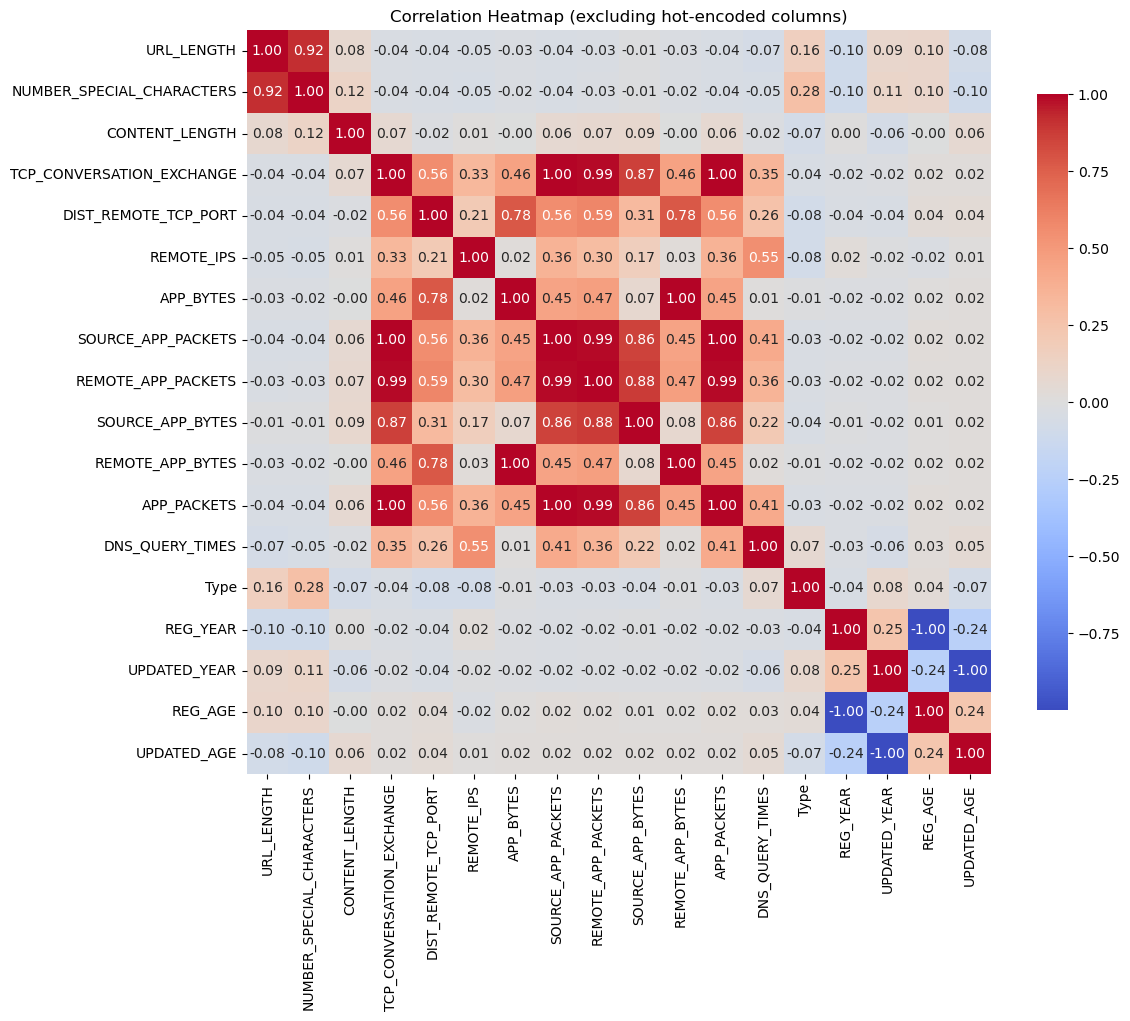

In [89]:
# List of hot-encoded columns to drop
hot_encoded_columns = [
    'WHOIS_COUNTRY_AT', 'WHOIS_COUNTRY_AU', 'WHOIS_COUNTRY_BE', 
    'WHOIS_COUNTRY_BR', 'WHOIS_COUNTRY_BS', 'WHOIS_COUNTRY_BY', 
    'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CH', 'WHOIS_COUNTRY_CN', 
    'WHOIS_COUNTRY_CY', 'WHOIS_COUNTRY_CZ', 'WHOIS_COUNTRY_DE', 
    'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_FR', 'WHOIS_COUNTRY_GB', 
    'WHOIS_COUNTRY_HK', 'WHOIS_COUNTRY_IE', 'WHOIS_COUNTRY_IL', 
    'WHOIS_COUNTRY_IN', 'WHOIS_COUNTRY_IT', 'WHOIS_COUNTRY_JP', 
    'WHOIS_COUNTRY_KG', 'WHOIS_COUNTRY_KR', 'WHOIS_COUNTRY_KY', 
    'WHOIS_COUNTRY_LU', 'WHOIS_COUNTRY_LV', 'WHOIS_COUNTRY_NL', 
    'WHOIS_COUNTRY_NO', 'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_PH', 
    'WHOIS_COUNTRY_PK', 'WHOIS_COUNTRY_RU', 'WHOIS_COUNTRY_SC', 
    'WHOIS_COUNTRY_SE', 'WHOIS_COUNTRY_SI', 'WHOIS_COUNTRY_TH', 
    'WHOIS_COUNTRY_TR', 'WHOIS_COUNTRY_UA', 'WHOIS_COUNTRY_UG', 
    'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_UNKNOWN', 'WHOIS_COUNTRY_US', 
    'WHOIS_COUNTRY_UY', 'CHARSET_iso-8859', 'CHARSET_iso-8859-1', 
    'CHARSET_unknown', 'CHARSET_us-ascii', 'CHARSET_utf-8', 
    'CHARSET_windows-1251', 'CHARSET_windows-1252'
]

# Create a new DataFrame excluding hot-encoded columns
websites_filtered = websites_clean.drop(columns=hot_encoded_columns)

# Calculate the correlation matrix
corr = websites_filtered.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap (excluding hot-encoded columns)")
plt.show()


### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [37]:
! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.5/124.9 MB 4.7 MB/s eta 0:00:27
   ---------------------------------------- 1.4/124.9 MB 11.4 MB/s eta 0:00:11
   - -------------------------------------- 3.7/124.9 MB 21.6 MB/s eta 0:00:06
   -- ------------------------------------- 6.4/124.9 MB 31.5 MB/s eta 0:00:04
   -- ------------------------------------- 9.0/124.9 MB 35.8 MB/s eta 0:00:04
   --- ------------------------------------ 10.9/124.9 MB 54.4 MB/s eta 0:00:03
   ---- ----------------------------------- 13.8/124.9 MB 59.5 MB/s eta 0:00:02
   ----- ---------------------------------- 16.1/124.9 MB 59.5 MB/s eta 0:00:02
   ----- ---------------------------------- 18.1/124.9 MB 59.5 MB/s eta 0:00:02
   ------ --------------------------------- 21.1/124.9 MB 65.6 MB/

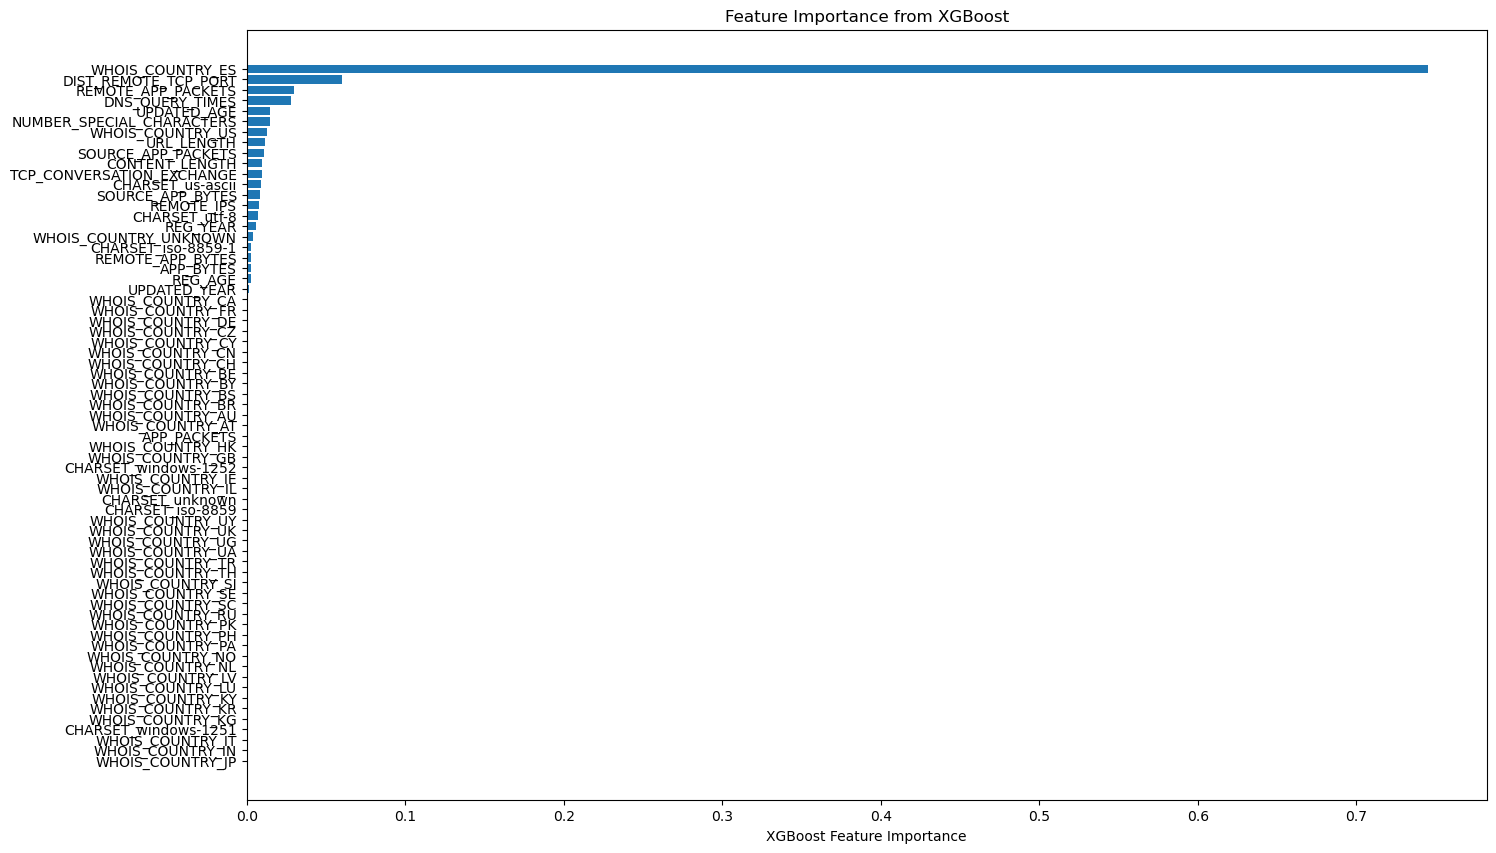

In [81]:
# Prepare the data
X = websites_clean.drop('Type', axis=1)  # Features
y = websites_clean['Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBClassifier
model = xgb.XGBClassifier(eval_metric='logloss')

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importances
sort_idx = model.feature_importances_.argsort()

# Set the figure size
plt.figure(figsize=(16, 10))  # Width, Height in inches

# Plot feature importances
plt.barh(X.columns[sort_idx], model.feature_importances_[sort_idx])
plt.xlabel("XGBoost Feature Importance")
plt.title("Feature Importance from XGBoost")
plt.show()

In [77]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9634831460674157
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       306
           1       0.93      0.80      0.86        50

    accuracy                           0.96       356
   macro avg       0.95      0.90      0.92       356
weighted avg       0.96      0.96      0.96       356



    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [97]:
# Remove columns with high collinearity
websites_clean_2 = websites_clean.drop(columns=['TCP_CONVERSATION_EXCHANGE', 'SOURCE_APP_PACKETS', 'APP_PACKETS', 'REMOTE_APP_BYTES'])


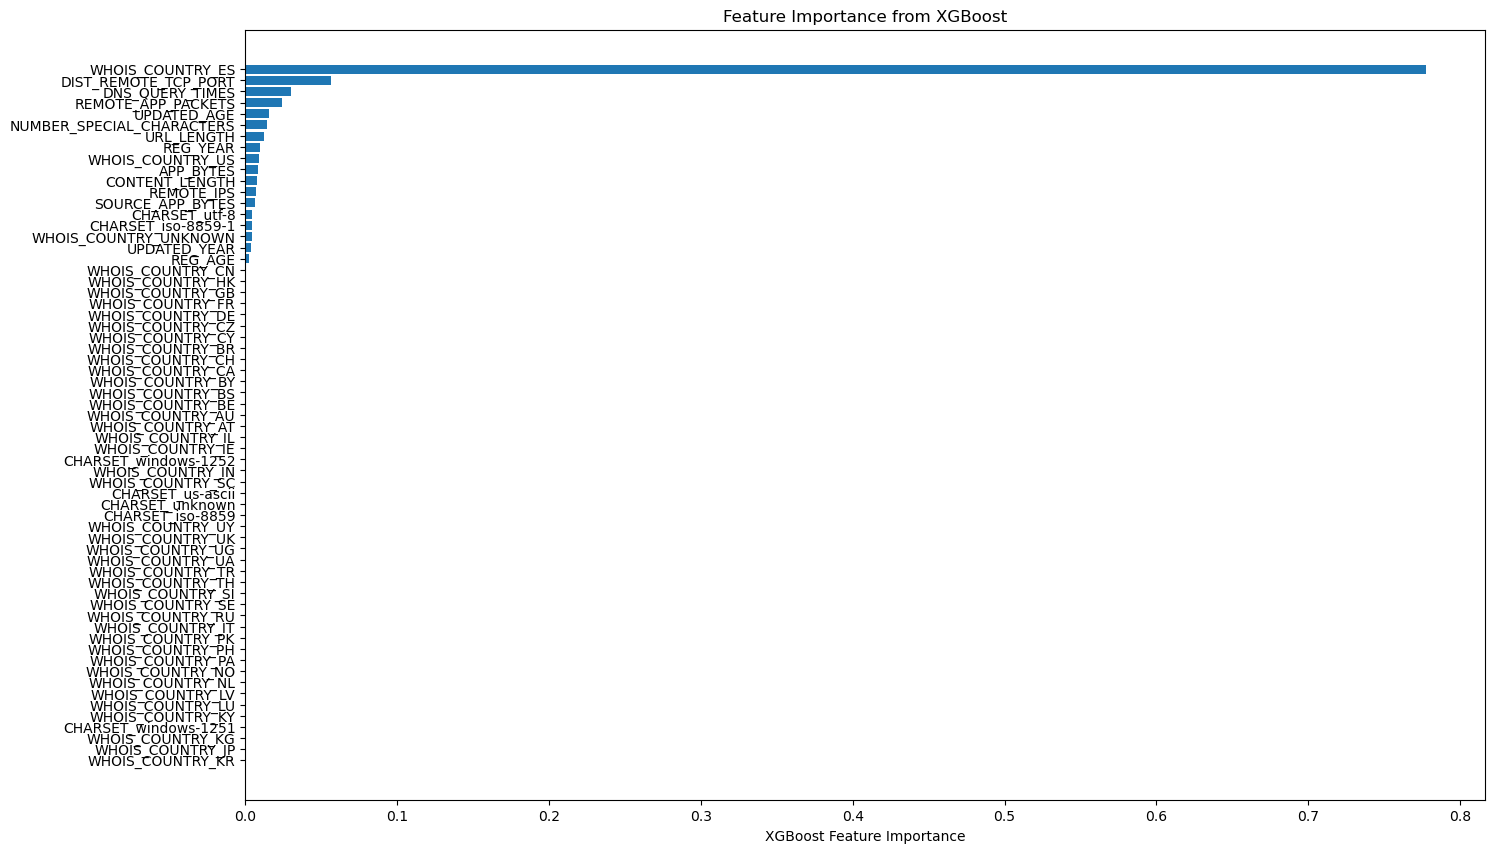

Accuracy: 0.9662921348314607
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       306
           1       0.95      0.80      0.87        50

    accuracy                           0.97       356
   macro avg       0.96      0.90      0.93       356
weighted avg       0.97      0.97      0.97       356



In [99]:
# Prepare the data
X = websites_clean_2.drop('Type', axis=1)  # Features
y = websites_clean_2['Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBClassifier
model = xgb.XGBClassifier(eval_metric='logloss')

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importances
sort_idx = model.feature_importances_.argsort()

# Set the figure size
plt.figure(figsize=(16, 10))  # Width, Height in inches

# Plot feature importances
plt.barh(X.columns[sort_idx], model.feature_importances_[sort_idx])
plt.xlabel("XGBoost Feature Importance")
plt.title("Feature Importance from XGBoost")
plt.show()

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

####################
##QUESTION########### was hot encoding done correctly here? theyre treated like a separate feature

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [3]:
import pandas as pd

# Load the dataset
websites = pd.read_csv(r'C:\Users\ievav\OneDrive\Documents\Ironhack\Assignments\lab-supervised-learning-es\website.csv')
websites.info()

# Check for missing values in each column
missing_values = websites.isna().sum()

# Display columns with missing values
missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

CHARSET                 7
SERVER                176
CONTENT_LENGTH        812
WHOIS_COUNTRY         306
WHOIS_STATEPRO        362
WHOIS_REGDATE         127
WHOIS_UPDATED_DATE    139
DNS_QUERY_TIMES         1
dtype: int64

In [5]:
# Firts we will drop the columns with more than 50% of missing data

threshold = len(websites) * 0.5
columns_with_missing_more_than_50 = missing_values[missing_values > threshold]
print(columns_with_missing_more_than_50) # none of the columns have more than 50% missing data

Series([], dtype: int64)


In [7]:
websites_cleaned = websites.dropna()

# Optionally, you can check the shape of the original and cleaned DataFrame
print("Original shape:", websites.shape)
print("Cleaned shape:", websites_cleaned.shape)

Original shape: (1781, 21)
Cleaned shape: (636, 21)


#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [10]:
websites_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 3 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        636 non-null    object 
 1   URL_LENGTH                 636 non-null    int64  
 2   NUMBER_SPECIAL_CHARACTERS  636 non-null    int64  
 3   CHARSET                    636 non-null    object 
 4   SERVER                     636 non-null    object 
 5   CONTENT_LENGTH             636 non-null    float64
 6   WHOIS_COUNTRY              636 non-null    object 
 7   WHOIS_STATEPRO             636 non-null    object 
 8   WHOIS_REGDATE              636 non-null    object 
 9   WHOIS_UPDATED_DATE         636 non-null    object 
 10  TCP_CONVERSATION_EXCHANGE  636 non-null    int64  
 11  DIST_REMOTE_TCP_PORT       636 non-null    int64  
 12  REMOTE_IPS                 636 non-null    int64  
 13  APP_BYTES                  636 non-null    int64  
 14

# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [14]:
# Check for missing values in each column
missing_values = websites.isna().sum()


In [16]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
BS                   4
ru                   4
AT                   4
HK                   3
us                   3
TR                   3
BE                   3
DE                   3
SC                   3
KY                   3
SE                   3
BR                   2
UY                   2
Cyprus               2
SI                   2
UA                   2
RU                   2
IL                   2
NO                   2
KG                   2
TH                   1
se                   1
LV                   1
LU                   1
United Kingdom       1
UG                  

In [18]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites_cleaned.WHOIS_COUNTRY = websites_cleaned.WHOIS_COUNTRY.apply(lambda x : good_country[x])




C:\Users\ievav\AppData\Local\Temp\ipykernel_12228\1220146050.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  websites_cleaned.WHOIS_COUNTRY = websites_cleaned.WHOIS_COUNTRY.apply(lambda x : good_country[x])


Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [21]:
def print_bar_plot(x, y):
    plt.figure(figsize=(15, 10))  # Set the figure size first
    plt.bar(x, y)
    plt.xlabel('X-axis Label')  # Add labels for clarity
    plt.ylabel('Y-axis Label')
    plt.title('Bar Plot Title')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.show()

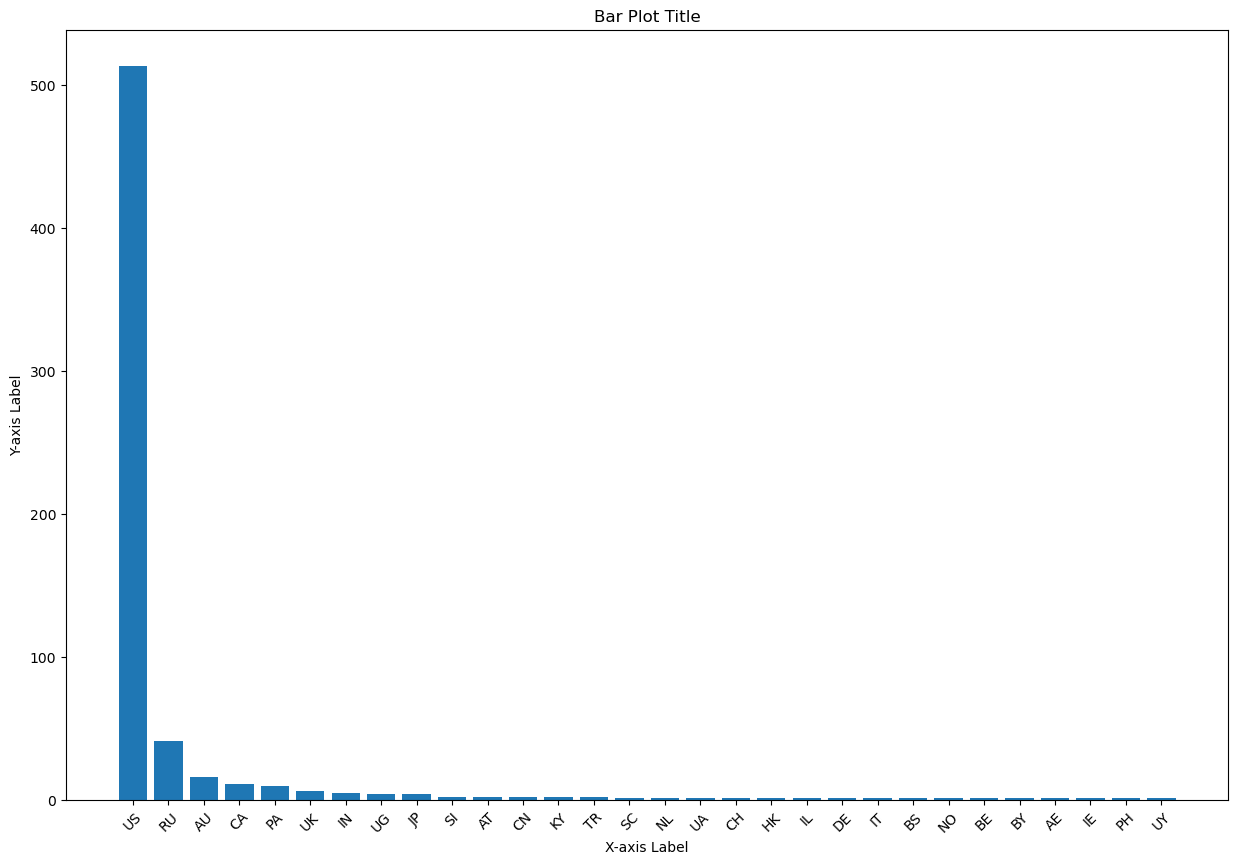

In [23]:
print_bar_plot(websites_cleaned.WHOIS_COUNTRY.unique(),websites_cleaned.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

C:\Users\ievav\AppData\Local\Temp\ipykernel_12228\3477816748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].where(websites_cleaned['WHOIS_COUNTRY'].isin(top_countries), 'OTHER')


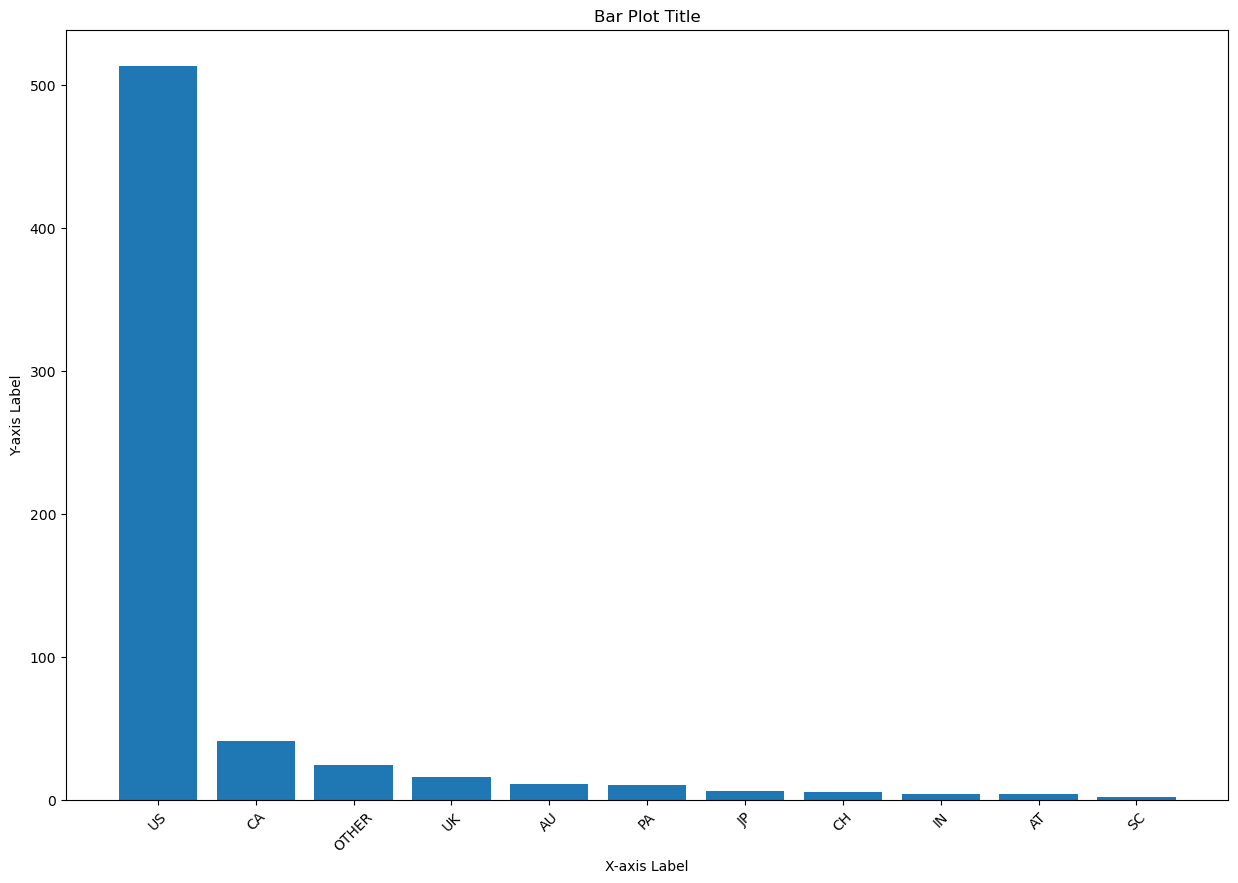

In [25]:
# Count the occurrences of each country
country_counts = websites_cleaned['WHOIS_COUNTRY'].value_counts()

# Get the top 10 countries
top_countries = country_counts.nlargest(10).index

# Replace countries that are not in the top 10 with 'OTHER'
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].where(websites_cleaned['WHOIS_COUNTRY'].isin(top_countries), 'OTHER')

# Now you can plot the updated data
country_counts_updated = websites_cleaned['WHOIS_COUNTRY'].value_counts()

# Call the function to plot the updated country counts
print_bar_plot(country_counts_updated.index, country_counts_updated.values)

Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [52]:
websites_cleaned = websites_cleaned.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)
websites_cleaned.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,17,6,2,nginx,162.0,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
6,18,6,2,Apache,345.0,US,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,19,6,4,Microsoft,324.0,US,0,0,0,0,0,0,0,0,0,0.0,0
11,20,6,4,Microsoft,324.0,US,0,0,0,0,0,0,0,0,0,0.0,0
16,21,7,2,nginx,686.0,OTHER,6,0,2,603,8,9,1580,745,8,2.0,1


# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [50]:
websites_cleaned.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                        int64
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [27]:
websites_cleaned.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [33]:
websites_cleaned = websites_cleaned.drop(['URL'], axis=1)

KeyError: "['URL'] not found in axis"

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [35]:
print(websites_cleaned['CHARSET'].unique())

['ISO-8859-1' 'iso-8859-1' 'us-ascii' 'utf-8' 'UTF-8' 'windows-1251']


`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [37]:

charset_order = {
    'utf-8': 1,
    'UTF-8': 1,  # Considered the same as 'utf-8'
    'ISO-8859-1': 2,
    'iso-8859-1': 2,  # Considered the same as 'ISO-8859-1'
    'windows-1251': 3,
    'us-ascii': 4,
}
websites_cleaned['CHARSET'] = websites_cleaned['CHARSET'].map(charset_order)

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [46]:
def relabel_server(server):
    if 'Microsoft' in server:
        return 'Microsoft'
    elif 'Apache' in server:
        return 'Apache'
    elif 'nginx' in server:
        return 'nginx'
    else:
        return 'Other'

# Apply the function to the 'SERVER' column
websites_cleaned['SERVER'] = websites_cleaned['SERVER'].apply(relabel_server)

# Check the unique values in the 'SERVER' column
print(websites_cleaned['SERVER'].unique())

['nginx' 'Apache' 'Microsoft' 'Other']
['nginx' 'Apache' 'Microsoft' 'Other']


OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [54]:
print(websites_cleaned['SERVER'].unique())
websites_cleaned = pd.get_dummies(websites_cleaned, columns=['SERVER'], drop_first=True)

['nginx' 'Apache' 'Microsoft' 'Other']


Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [61]:
websites_cleaned.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,SERVER_Microsoft,SERVER_Other,SERVER_nginx
3,17,6,2,162.0,US,31,22,3,3812,39,37,18784,4380,39,8.0,0,False,False,True
6,18,6,2,345.0,US,12,0,3,1189,14,13,8559,1327,14,2.0,0,False,False,False
7,19,6,4,324.0,US,0,0,0,0,0,0,0,0,0,0.0,0,True,False,False
11,20,6,4,324.0,US,0,0,0,0,0,0,0,0,0,0.0,0,True,False,False
16,21,7,2,686.0,OTHER,6,0,2,603,8,9,1580,745,8,2.0,1,False,False,True


In [72]:
# One-hot encode the WHOIS_COUNTRY column
websites_cleaned = pd.get_dummies(websites_cleaned, columns=['WHOIS_COUNTRY'], drop_first=True)
websites_cleaned.head(20)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,...,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CH,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_SC,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,17,6,2,162.0,31,22,3,3812,39,37,...,False,False,False,False,False,False,False,False,False,True
6,18,6,2,345.0,12,0,3,1189,14,13,...,False,False,False,False,False,False,False,False,False,True
7,19,6,4,324.0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
11,20,6,4,324.0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
16,21,7,2,686.0,6,0,2,603,8,9,...,False,False,False,False,False,True,False,False,False,False
19,22,7,4,324.0,9,0,4,850,11,9,...,False,False,False,False,False,False,False,False,False,True
21,22,6,2,318.0,8,6,6,696,8,10,...,False,False,False,False,False,False,False,False,False,True
23,22,7,1,4421.0,12,0,2,2259,16,12,...,True,False,False,False,False,False,False,False,False,False
25,22,6,2,441.0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
27,22,6,1,6671.0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False


# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [76]:
from sklearn.model_selection import train_test_split

# Prepare the data
X = websites_cleaned.drop('Type', axis=1)  # Features
y = websites_cleaned['Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

Accuracy: 0.953125
Confusion Matrix:
 [[116   1]
 [  5   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       117
           1       0.86      0.55      0.67        11

    accuracy                           0.95       128
   macro avg       0.91      0.77      0.82       128
weighted avg       0.95      0.95      0.95       128



C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


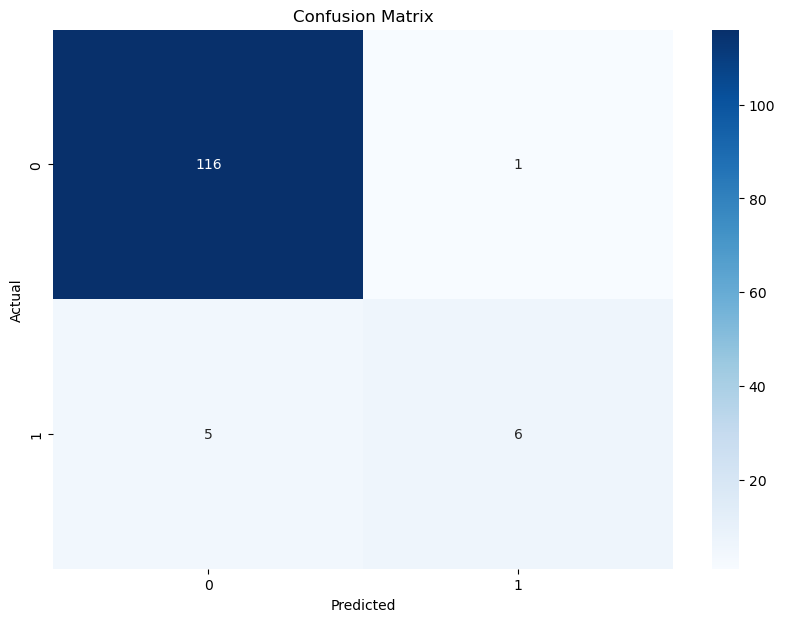

In [89]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter if needed

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [92]:
# Fit the model to the training data
model.fit(X_train, y_train)

C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

Accuracy: 0.953125
Confusion Matrix:
 [[116   1]
 [  5   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       117
           1       0.86      0.55      0.67        11

    accuracy                           0.95       128
   macro avg       0.91      0.77      0.82       128
weighted avg       0.95      0.95      0.95       128



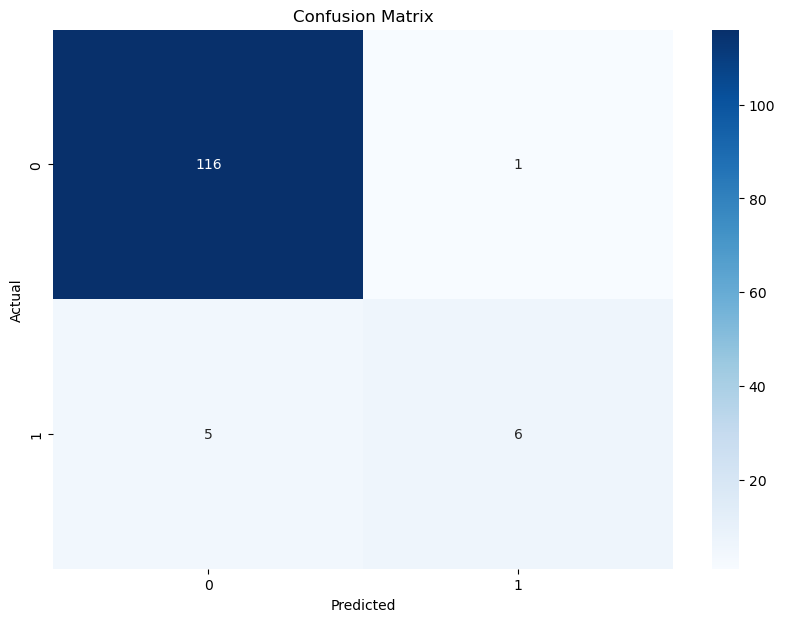

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.
Creo que el modelo hizo un buen trabajo al predecir la actividad maliciosa, con una precisión del 95%.

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

Confusion Matrix:
[[112   5]
 [  4   7]]
Accuracy Score: 0.9296875


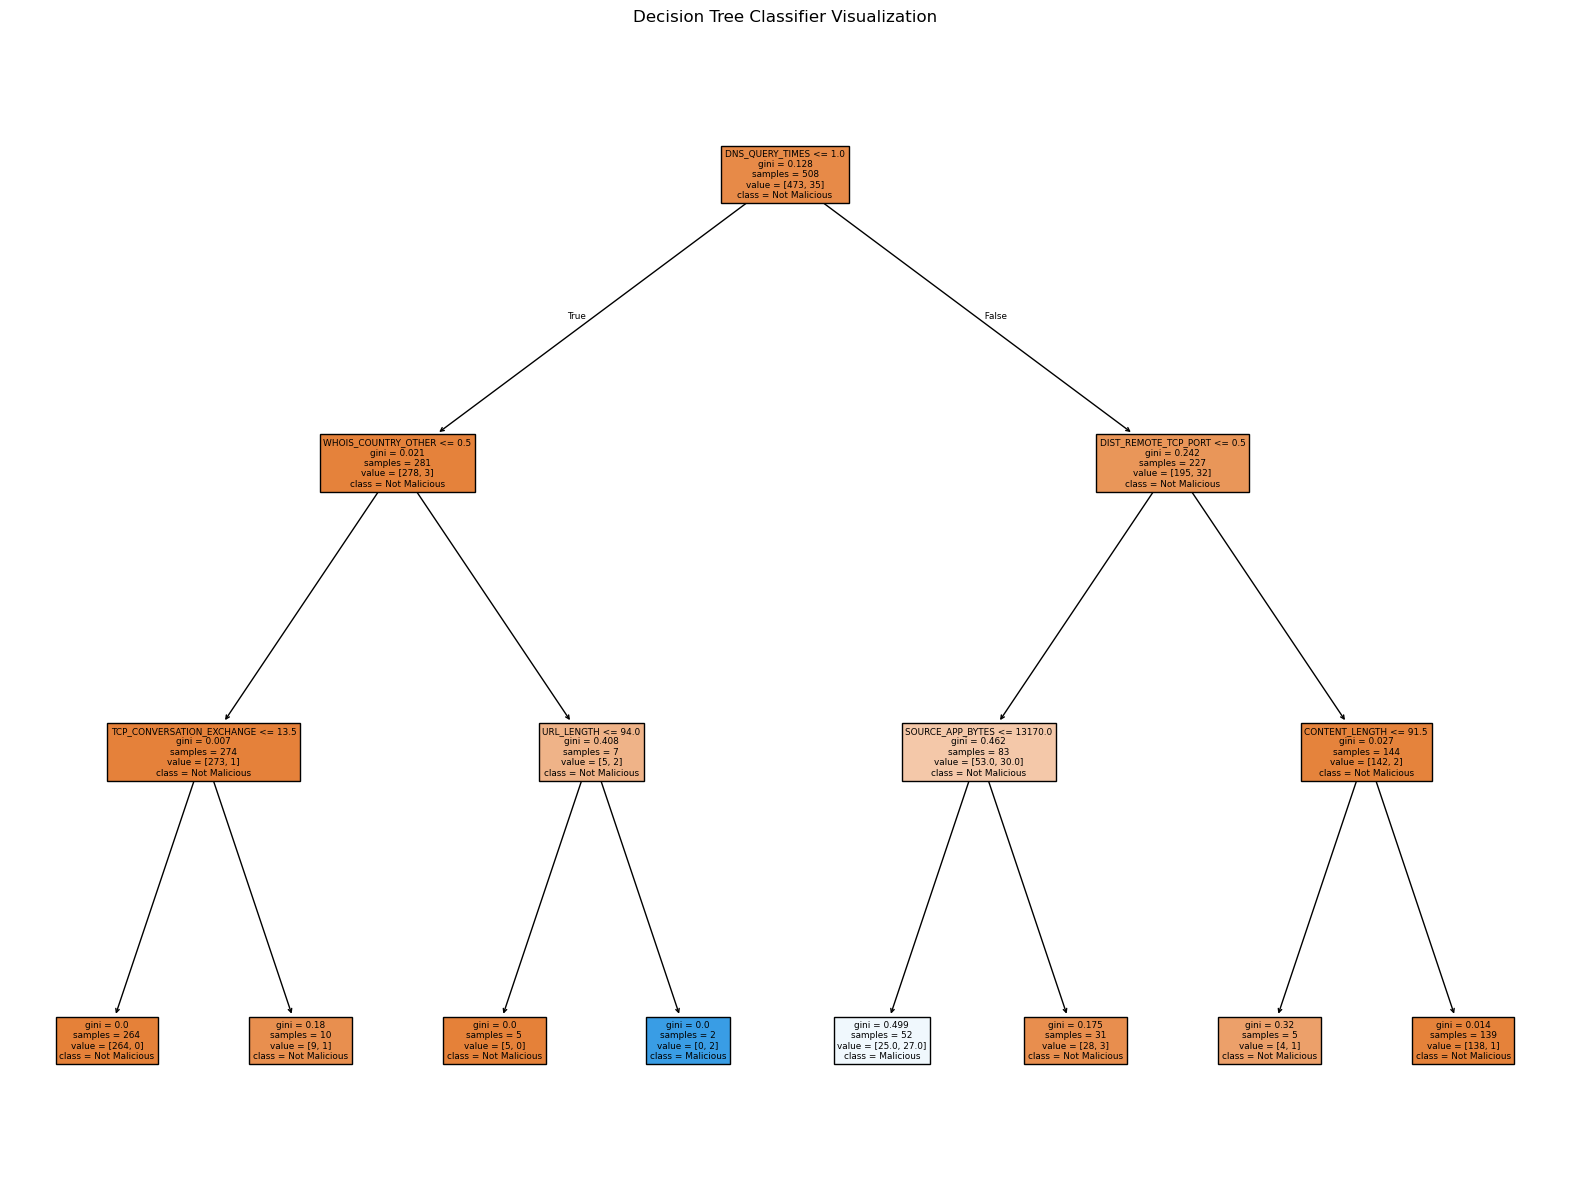

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Initialize the Decision Tree Classifier with max_depth=3
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=32)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)



Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [ ]:
# Predict using the test data
y_pred = dt_classifier.predict(X_test)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Optionally, you can visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Not Malicious', 'Malicious'])
plt.title('Decision Tree Classifier Visualization')
plt.show()

#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

Confusion Matrix:
[[114   3]
 [  3   8]]
Accuracy Score: 0.953125


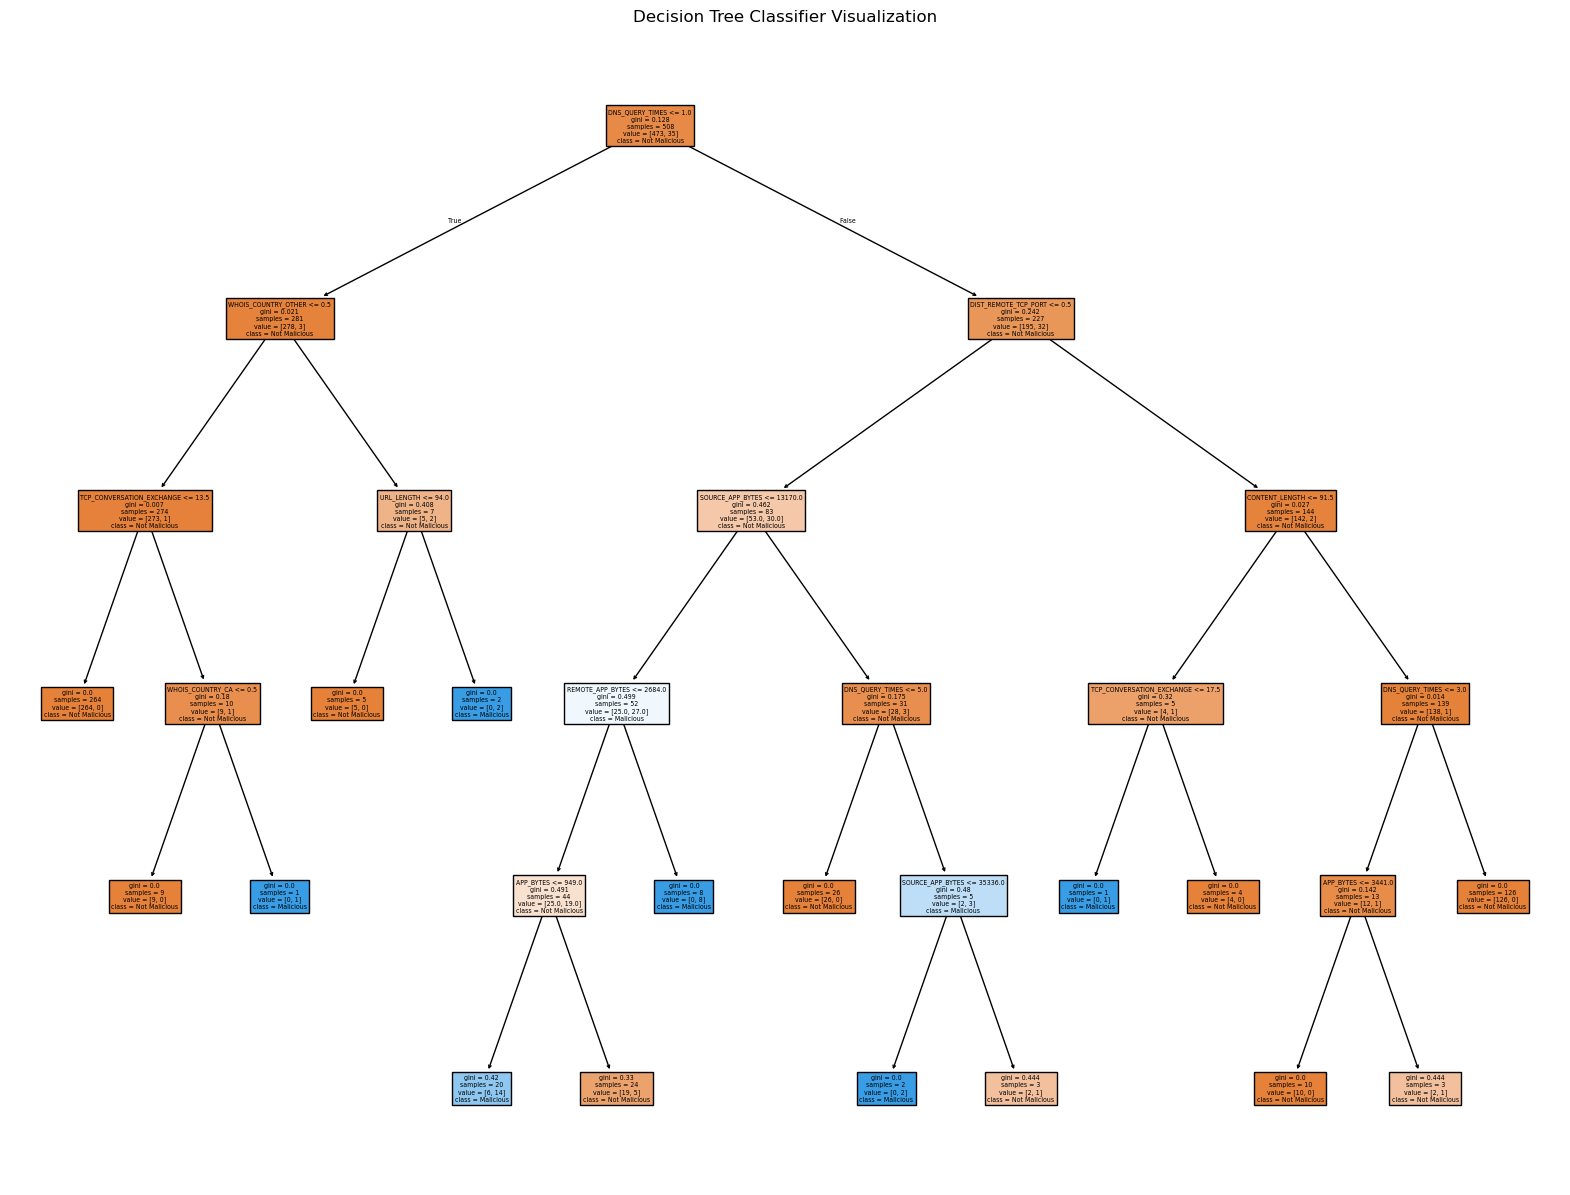

In [104]:
# Initialize the Decision Tree Classifier with max_depth=3
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=29)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Predict using the test data
y_pred = dt_classifier.predict(X_test)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Optionally, you can visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Not Malicious', 'Malicious'])
plt.title('Decision Tree Classifier Visualization')
plt.show()

¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

Si! Accuracy es mas alta entonces este modelo performa mejor!

### Conclusión:

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [115]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare the data
X = websites_cleaned.drop('Type', axis=1)  # Features
y = websites_cleaned['Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000000)

# Feature scaling using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.95
Confusion Matrix:
[[118   3]
 [  3   4]]


## Conclusiones:

Add your comments here: The scaler did not significalty change the results. I would say it is better to retain the original shape of the data to make interpretability easier. 